In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [26]:
a = [2,3,-0.5]
b = 200

In [27]:
rooms = np.random.randint(low=1, high=80,size=20)
area = np.random.randint(low=1440, high=3600,size=20)
school_distance = np.random.randint(low=100, high=1000,size=20)
x = np.array([rooms, area, school_distance])
x = np.transpose(x)

In [28]:
rooms = np.unique(rooms)

In [29]:
y = rooms.dot(a[0]) + b

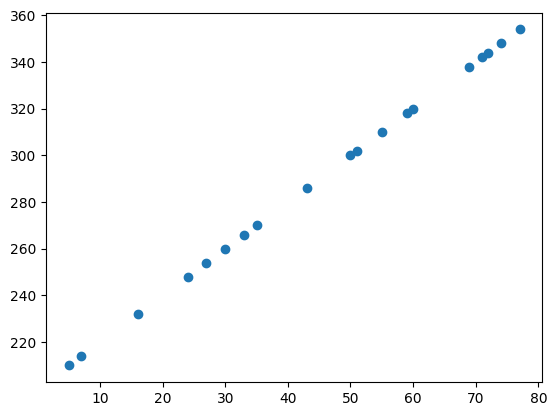

In [30]:
plt.scatter(rooms, y)
plt.show()

In [31]:
def simple_trick(base_price, price_per_room, num_rooms, price):
    small_random_1 = random.random() * 0.1
    small_random_2 = random.random() * 0.1
    predicted_price = base_price + price_per_room*num_rooms
    if(abs(predicted_price - price) < price * 5/100):
        return price_per_room, base_price, False
    if price > predicted_price and num_rooms > 0:
        price_per_room += small_random_1
        base_price += small_random_2
    if price > predicted_price and num_rooms < 0:
        price_per_room -= small_random_1
        base_price += small_random_2
    if price < predicted_price and num_rooms > 0:
        price_per_room -= small_random_1
        base_price -= small_random_2
    if price < predicted_price and num_rooms < 0:
        price_per_room -= small_random_1
        base_price += small_random_2
    return price_per_room, base_price, True

In [32]:
def square_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    predicted_price = base_price + price_per_room*num_rooms
    price_per_room += learning_rate*num_rooms*(price-predicted_price)
    base_price += learning_rate*(price-predicted_price)
    return price_per_room, base_price, True

In [33]:
random.seed(0)
def linear_regression(features, labels, learning_rate=0.01, epochs = 1000):
    price_per_room = random.random()
    base_price = random.random()
    for epoch in range(epochs):
        i = random.randint(0, len(features)-1)
        num_rooms = features[i]
        price = labels[i]
        price_per_room, base_price, cont = square_trick(base_price,
                                                  price_per_room,
                                                  num_rooms,
                                                  price, 0.01)
       
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    return price_per_room, base_price

In [34]:
linear_regression(rooms, y, learning_rate = 0.01, epochs = 10000)

Price per room: nan
Base price: nan


C:\Users\iampk\AppData\Local\Temp\ipykernel_16068\2166515683.py:2: RuntimeWarning: overflow encountered in scalar multiply
  predicted_price = base_price + price_per_room*num_rooms
C:\Users\iampk\AppData\Local\Temp\ipykernel_16068\2166515683.py:3: RuntimeWarning: invalid value encountered in scalar add
  price_per_room += learning_rate*num_rooms*(price-predicted_price)
C:\Users\iampk\AppData\Local\Temp\ipykernel_16068\2166515683.py:4: RuntimeWarning: invalid value encountered in scalar add
  base_price += learning_rate*(price-predicted_price)


(nan, nan)